In [22]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2022/9/29 14:05
# @Author  : Wang Yujia
# @File    : GT_fixed_symmetry_gen_demo.ipynb
# @Description : Demo,试图（在对称条件下的）计算定价拍卖的 P与N

# 0. what for
1. Calculating trial for fixed-price in symmetry situation
2. `b` is bidfee,`s` is bidinc,`v` is valuation, `p`is the price winners will buy with
3. Eq1:
$$ u[i] = 1-b/(v-p),\ st. \ v \geq p\ $$
4. According to Chain Rule, there is :
$$ p(Duration(or\ 'n') = i) = (1-u[i+1])*u[i]*[i-1]..*u[1] $$
5. Since for fixed-price, $u$ won't change in the process of an auction. Set an *threshold*  by hand to limit $u$
6. `u`可以利用setting值计算，计算`p`之前必须先计算出`u`

# 1. Preparations
1. Setting设置：`b` is bidfee,`s` is bidinc,`v` is valuation, `p`is the price winners will buy with

In [23]:
# setting
b = 0.6   # bid fee
v = 30    # valuation
p = 10    # p is for fixed-price

# A not that good but toy example
#b = 10
#v = 50
#p = 10

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Set threshold K
1. $n$ 的threshold $K$ 设置为ascending-price下的$Q$的中位数: $K = 500$ (中位数是490)
2. 但是这个效果不好，设为300

In [24]:
K = 300
print("The threshold is: ",K)

The threshold is:  300


# 3.U
1. 计算`u`，在fixed-price下，`u`不会随着轮数的增加而变化

In [25]:
u = 1-b/(v-p)
print("u is like: ", u)

u is like:  0.97


# 4. P
1. 计算`p`，注意起始位置是0,而且p[i] = (1-u[i+1])\*u[i]\*[i-1]..\*u[1]
2. `p`下标从`0`开始，最大可以到`K`，此时`u`访问到最大下标`K+1`。因此`p`的大小 == `p`的有效大小 == `K+1`
3. `p`和`u`的有效长度都是`K+1`，只不过`u`为了保持意义，下标从`1`开始
4. **New:** save `P[K]` for `1-sum(P)`, so `P[K]` means the prob that one auction will end after $K$ rounds

In [26]:
N = list(range(0,K+1))
P=[0]*(K+1)
P[0] = 1 - u
#for i in range(1,(K+1)):
for i in range(1,(K)):
    P[i] = u*P[i-1]
assert(P[K]==0,"something wrong with P")
P[K] = 1-np.sum(P)

<>:7: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:7: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:7: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-26-49408529b7d5>:7: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(P[K]==0,"something wrong with P")


# 5. 输出与绘图

P is like:  [0.030000000000000027, 0.029100000000000025, 0.028227000000000023, 0.027380190000000023, 0.02655878430000002, 0.025762020771000017, 0.024989160147870015, 0.024239485343433915, 0.023512300783130897, 0.02280693175963697, 0.02212272380684786, 0.021459042092642423, 0.02081527082986315, 0.020190812704967257, 0.01958508832381824, 0.018997535674103692, 0.018427609603880582, 0.017874781315764164, 0.01733853787629124, 0.0168183817400025, 0.016313830287802426, 0.01582441537916835, 0.0153496829177933, 0.0148891924302595, 0.014442516657351715, 0.014009241157631164, 0.013588963922902228, 0.01318129500521516, 0.012785856155058705, 0.012402280470406944, 0.012030212056294735, 0.011669305694605892, 0.011319226523767715, 0.010979649728054684, 0.010650260236213042, 0.010330752429126651, 0.010020829856252852, 0.009720204960565266, 0.009428598811748307, 0.009145740847395858, 0.008871368621973982, 0.008605227563314763, 0.00834707073641532, 0.00809665861432286, 0.007853758855893173, 0.00761814609

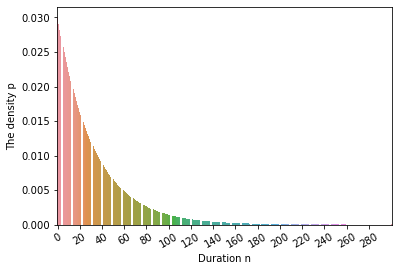

In [27]:
print("P is like: ", P)
print("And sum of P is:", np.sum(P))
print("The distrb. of P wrt. N is: \n")

plt.xlabel("Duration n")
plt.ylabel("The density p")
sns.barplot(x = N,y=P)
plt.xticks(np.arange(0, K, step=20),rotation=30)
plt.show()